In [8]:
!git clone https://github.com/NiklasSlager/EquDist.git

Cloning into 'EquDist'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 51 (delta 8), reused 29 (delta 0), pack-reused 0
Receiving objects: 100% (51/51), 29.87 KiB | 3.73 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [9]:

import sys
sys.path.append('/content/EquDist')

In [12]:
!pip install jaxopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 3.6 MB/s eta 0:00:00


[1 1 1]
[36.534   37.26502 37.93954]


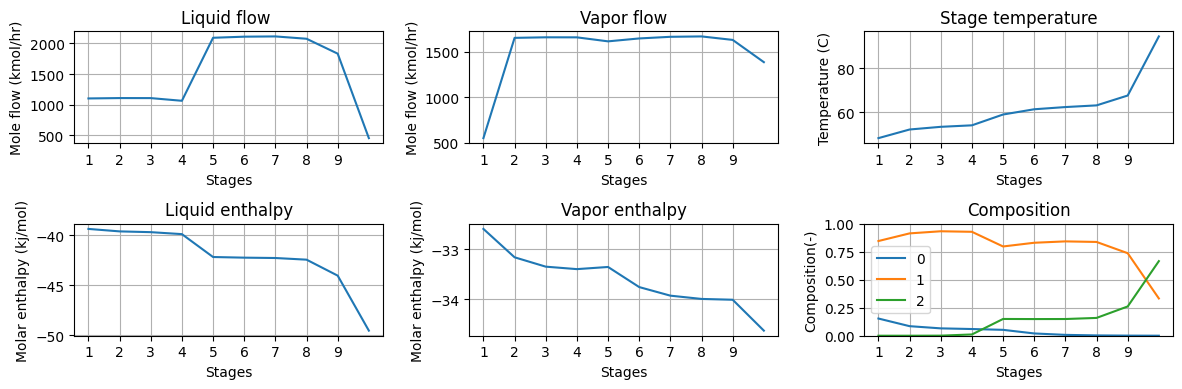

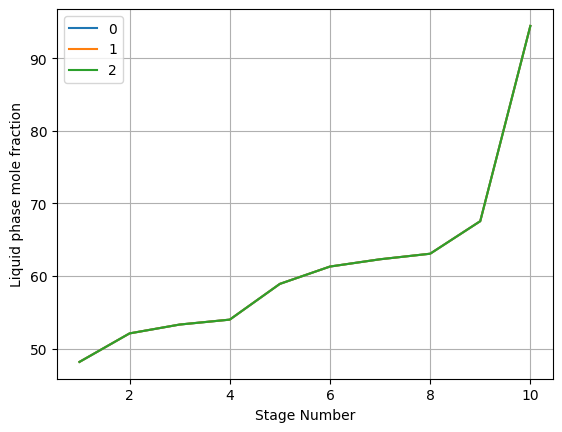

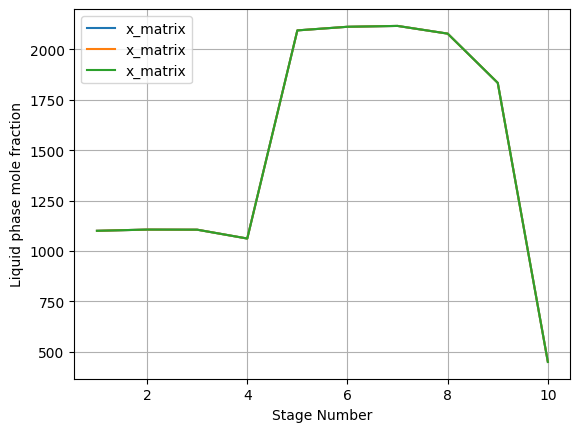

In [15]:
import jax.numpy as jnp
from time import time
from jax import jit, vmap
import matplotlib.pyplot as plt
from NR_model_test.plot_generation import plot_function
from NR_model_test.NR_model import inside_simulation as simulation
from NR_model_test.NR_model import initialize
from NR_model_test.NR_model import initialize
import os

state_init= initialize()
zf = jnp.array([0.2, 0.5, 0.3], dtype=float)
tac_array = jnp.zeros(10, dtype=float)

zf = jnp.array([0.2, 0.5, 0.3])
tac_array = jnp.zeros(30, dtype=float)
for i in range(2):
    state, iterations, res = vmap(jit(simulation), in_axes=(None, 0, 0, None, None, None, None, None))(
        state_init,
        #        jnp.array((10, 11), dtype=int),
#        jnp.array((5, 5), dtype=int),
        jnp.arange(10, 13),
        #jnp.concatenate(jnp.concatenate((jnp.arange(5, 10)[:, None], jnp.arange(5, 10)[:, None]), axis=1)),
        jnp.array((5, 5, 6,), dtype=int),
        jnp.array(2.0, dtype=float),
        jnp.array(1000.0, dtype=float),
        jnp.array(zf, dtype=float),
        jnp.array(450 + i*100, dtype=float),
        jnp.array(1 + i, dtype=float)
    )

print(iterations)
print(state.TAC)
#plot_function(jnp.arange(1, state.Nstages+1), state.L[0:state.Nstages], state.V[0:state.Nstages], state.temperature[0:state.Nstages], state.Hliq[0:state.Nstages], state.Hvap[0:state.Nstages], state.X[jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages], state.Y[jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages], jnp.where(zf != 0, jnp.arange(0, len(zf)), 0))
plot_function(jnp.arange(1, state.Nstages[0]+1), state.L[0, 0:state.Nstages[0]], state.V[0, 0:state.Nstages[0]], state.temperature[0, 0:state.Nstages[0]], state.Hliq[0, 0:state.Nstages[0]], state.Hvap[0, 0:state.Nstages[0]], state.X[0, jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages[0]], state.Y[0, jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages[0]], jnp.where(zf != 0, jnp.arange(0, len(zf)), 0))

plt.show()
